In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
#to lod the dataset
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [5]:
df.isnull().sum()/df.shape[0]*100

age               0.0
sex               0.0
bmi               0.0
children          0.0
smoker            0.0
region            0.0
charges           0.0
insuranceclaim    0.0
dtype: float64

<Axes: >

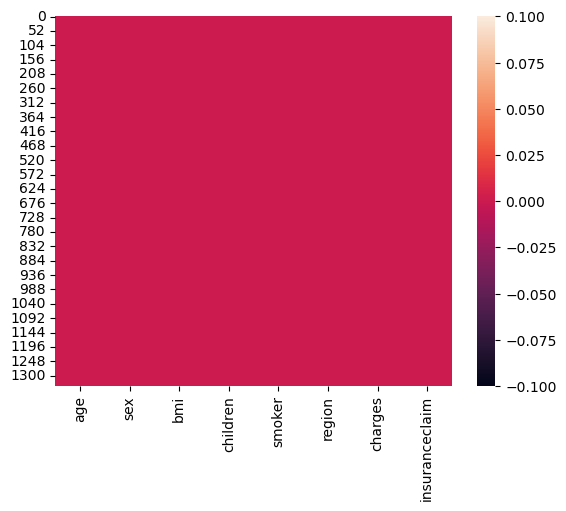

In [6]:
sb.heatmap(df.isnull())

In [7]:
df.duplicated().sum()

1

In [8]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
581,19,1,30.59,0,0,1,1639.5631,1


In [9]:
#to drop_duplicates
df.drop_duplicates(inplace=True)

In [10]:
X=df.drop('insuranceclaim',axis=1) #input is always 2d
Y=df['insuranceclaim'] #ouput is always 1D

In [11]:
X.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [12]:
Y.head()

0    1
1    1
2    0
3    0
4    1
Name: insuranceclaim, dtype: int64

In [13]:
#train test split
from sklearn.model_selection import train_test_split

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1) #every time data change  Range (1-100)


In [15]:
X_train.shape

(935, 7)

In [16]:
X_test.shape

(402, 7)

In [17]:
Y_train.shape

(935,)

In [40]:
Y_test.shape

(402,)

In [19]:
#lets give the data to the matchine by overfitting it into same unit
#we use scaling for xtrain and xtest
#scaling we us on input type of data
#it will convert the data into numpy .arraay

from sklearn.preprocessing import StandardScaler     #train test performanace 3main method
#create an object for the standardScalar
ss=StandardScaler()

#applying scaling on X_train we use fit_transform()
X_train=ss.fit_transform(X_train)  # fit--- train 

#applying scaling on X_test we use transform()
X_test=ss.transform(X_test)

In [20]:
X_train

array([[ 0.76935907, -1.05611771, -0.54584829, ..., -0.53158148,
        -1.38997482,  0.97973397],
       [ 1.34169182, -1.05611771, -0.57768002, ..., -0.53158148,
        -0.48304777, -0.11634023],
       [ 1.5563166 ,  0.94686415,  0.91841121, ..., -0.53158148,
         1.33080632,  1.16614713],
       ...,
       [-1.23380557,  0.94686415,  0.5280537 , ..., -0.53158148,
         0.42387927, -0.97698935],
       [ 0.05394313, -1.05611771, -1.40698031, ...,  1.88117914,
         0.42387927,  0.47286216],
       [ 1.41323342,  0.94686415,  1.76278969, ...,  1.88117914,
         0.42387927,  2.88193206]])

In [21]:
X_test

array([[ 0.3401095 , -1.05611771,  1.39588714, ...,  1.88117914,
        -0.48304777,  2.3934608 ],
       [ 1.27015023,  0.94686415,  0.15444973, ..., -0.53158148,
        -0.48304777, -0.18729799],
       [ 1.12706704, -1.05611771,  0.29769251, ..., -0.53158148,
        -1.38997482, -0.14439093],
       ...,
       [ 0.98398385,  0.94686415, -1.54435935, ..., -0.53158148,
         1.33080632, -0.29237275],
       [-1.30534716, -1.05611771, -0.70668229, ..., -0.53158148,
         1.33080632, -0.9016684 ],
       [-1.01918078,  0.94686415, -0.73683866, ..., -0.53158148,
        -1.38997482, -0.89158843]])

In [22]:
#applying logistic Regression
from sklearn.linear_model import LogisticRegression

#create an object for logisticRegression
lr=LogisticRegression()
#lets train the model with 70% of data

#we use .fit() method of logisticRegression class
lr.fit(X_train,Y_train)


LogisticRegression()

In [23]:
#testing  the model with 30% of data
y_pred=lr.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [24]:
#creating dictonary to understand the data
dict={"Actual output":Y_test,"predicted output":y_pred}
df11=pd.DataFrame(dict)
df11.head(10)

,Actual output,predicted output
629,1,1
1087,1,1
283,1,1
790,1,1
594,1,1
579,0,0
478,1,1
255,1,0
350,0,1
262,1,1


In [25]:
#check for score
#score()  #accuracy score 
#inbuld method for logistics regression


lr.score(X_test,Y_test) #score alowys 0-1
#this score is known As Accurarcy Score
#most of the time ,accurary score is good or best

0.8855721393034826

In [26]:
#creat a classification report  for the above problem
from sklearn.metrics import classification_report

In [27]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       172
           1       0.89      0.91      0.90       230

    accuracy                           0.89       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.89      0.89      0.89       402



In [28]:
# Recall=Tp/(TP+FN)
#precision =TP/(TP+FP)

In [29]:
#creatin  a confusion matrix
from sklearn.metrics import confusion_matrix

In [35]:
print(confusion_matrix(Y_test,y_pred))

[[147  25]
 [ 21 209]]


In [36]:

# print(confusion_matrix(y_pred,Y_test))


In [37]:
#convert 2d array into 1d drray

In [38]:
TP,FP,FN,TN=confusion_matrix(Y_test,y_pred).flatten()

In [39]:
print("true postitve",TP)
print("True neg",TN)
print('false postive',FP)
print('False neg',FN)

true postitve 147
True neg 209
false postive 25
False neg 21
